# COMP24111 - Exercise 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (1), "crude" (2), "trade" (3) and "interest" (4).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To take advantage of the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [2]:
print(data[41]) # Sparse, will print the non-zero indices and their values.
print(data[41].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [3]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [4]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [5]:
print(labels[i])

0


For instance, by running

In [6]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [7]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [8]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [ 22 378 216 594 483 416 639 650 759 633]
Samples:   (0, 6119)	1
  (0, 6118)	1
  (0, 3635)	1
  (0, 3265)	1
  (0, 2789)	1
  (0, 1430)	1
  (0, 622)	1
  (0, 437)	2
  (0, 365)	1
  (0, 349)	1
  (0, 348)	1
  (0, 346)	1
  (0, 341)	1
  (0, 331)	2
  (0, 330)	1
  (0, 118)	1
  (0, 94)	1
  (0, 58)	1
  (0, 48)	1
  (0, 29)	1
  (0, 26)	1
  (0, 24)	1
  (0, 21)	2
  (0, 19)	1
  (0, 13)	1
  :	:
  (9, 5780)	2
  (9, 5779)	2
  (9, 3547)	2
  (9, 2571)	2
  (9, 2477)	3
  (9, 1728)	1
  (9, 1183)	1
  (9, 984)	3
  (9, 846)	1
  (9, 837)	1
  (9, 722)	1
  (9, 635)	1
  (9, 485)	1
  (9, 446)	2
  (9, 396)	1
  (9, 332)	5
  (9, 270)	1
  (9, 231)	2
  (9, 220)	1
  (9, 180)	1
  (9, 150)	1
  (9, 145)	1
  (9, 109)	1
  (9, 13)	1
  (9, 5)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you will need the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.

In [143]:
import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric, k):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric)
    
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices. essentially what is the 
    # smallest or the k smallest
    # values in the mth row as k is one we can do the smallest value
    nearest_neighbours = np.argsort(pairwise_distance, axis= 1)[:, :k]  # this should sort all the rows of pairwise_distance
    
    
    # nearest neighbours is the np.randomkth lowest values in the sortedValues matrix     
    
    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    
    
    most_frequent = scipy.stats.mode(nearest_labels, axis = 1).mode
    
    most_frequent_without_empty = np.squeeze(most_frequent)
    
    
    return most_frequent_without_empty

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.
Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies.

In [144]:
# randomly selecting 80 articles per class 

## this function would only work if your classes are evenly split and there are four of them
def accuracy_sc(y_true, y_pred):
    # taking the predicted class results
    classOneResults = y_pred[:int(y_true.size/4)]
    classTwoResults = y_pred[int(y_true.size/4):int(y_true.size/2)]
    classThreeResults = y_pred[int(y_true.size/2):int(y_true.size*(3/4))]
    classFourResults = y_pred[int(y_true.size*(3/4)):int(y_true.size)]
    # checking whether the predicted class 1 results are accurate 
    # when compared to the value they should be (0)
    classOneAccuracy = classOneResults[classOneResults == 0]
    classTwoAccuracy = classTwoResults[classTwoResults == 1]
    classThreeAccuracy = classThreeResults[classThreeResults == 2]
    classFourAccuracy = classFourResults[classFourResults == 3]

    # using the size of the arrays to tell me how many of the values were correct in each class
    # then dividing this by the total size of the array
    return (classOneAccuracy.size + classTwoAccuracy.size + classThreeAccuracy.size + classFourAccuracy.size) / y_true.size


    

# intialising the array so it can be later filled with accuracy scores
knnArray = np.array([])
   
training_samples = sample_indices(labels, 80, 80, 80, 80)
all_the_samples = sample_indices(labels, 200, 200, 200, 200)
testing_samples = np.setdiff1d(all_the_samples, training_samples)


for trail in range(20):
    ## setting up the training and testing samples 
    training_samples = sample_indices(labels, 80, 80, 80, 80)
    all_the_samples = sample_indices(labels, 200, 200, 200, 200)
    testing_samples = np.setdiff1d(all_the_samples, training_samples)
    # setting up the metric
    metric = "euclidean"

    # using the function I wrote earlier to calculate the accuracy score between the predicted and the actual
    accuracyScore = accuracy_sc(labels[testing_samples], knn_classify(data[testing_samples], data[training_samples], labels[training_samples], metric, 3))
    # adding the accuracy score to the array
    knnArray = np.append(knnArray, accuracyScore)
knnMean = np.mean(knnArray)
knnStd = np.std(knnArray)
print("mean: ", knnMean)
print("Standard deviation:", knnStd)




mean:  0.8619791666666667
Standard deviation: 0.022115493484960575


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

In [145]:
knnArray = np.array([])

for trail in range(20):
    ## setting up the training and testing samples 
    training_samples = sample_indices(labels, 80, 80, 80, 80)
    all_the_samples = sample_indices(labels, 200, 200, 200, 200)
    testing_samples = np.setdiff1d(all_the_samples, training_samples)
    
    ## using the cosine metric
    metric = "cosine"

    ## working out the accuracy score by comparing the tested true data to the data produced through the knn algorithm
    accuracyScore = accuracy_sc(labels[testing_samples], knn_classify(data[testing_samples], data[training_samples], labels[training_samples], metric, 3))
    
    ## adding these values to the an array
    knnArray = np.append(knnArray, accuracyScore)
    
# using this array to calculate the mean and the standard deviation
knnMean = np.mean(knnArray)
knnStd = np.std(knnArray)
print("mean: ", knnMean)
print("Standard deviation:", knnStd)

mean:  0.9606250000000001
Standard deviation: 0.007362748769613465


Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better, repeat the same experiment, varying the neighbour number $k$ from 1 to 50.
This time, record the average training errors and standard deviation over 20 trials, for different values of $k$.
Do the same for testing errors.

In [146]:
knnTestingMean = np.array([])
knnTrainingMean = np.array([])
knnTestingStd = np.array([])
knnTrainingStd = np.array([])


for k in range(1, 51):
    knnArrayTesting = np.array([])
    knnArrayTraining = np.array([])
    
    for trail in range(20):
        ## setting up the training and testing samples 
        # randomly selecting 80 articles
        training_samples1 = sample_indices(labels, 80, 80, 80, 80)
        # selecting all 200 articles from each class and then sorting them
        all_the_samples1 = sample_indices(labels, 200, 200, 200, 200)
        # the testing samples are the set difference between all the samples and the training samples
        testing_samples1 = np.setdiff1d(all_the_samples1, training_samples1)

        metric = "cosine"
        
        # training the knn
        knnTest = knn_classify(data[testing_samples1], data[training_samples1], labels[training_samples], metric, k)
        knnTrain = knn_classify(data[training_samples1], data[training_samples1], labels[training_samples], metric, k)
        # finding the testing accuracy and adding it to the array
        testingAccuracy = accuracy_sc(labels[testing_samples1], knnTest)
        knnArrayTesting = np.append(knnArrayTesting, testingAccuracy)
        # finding the training accuracy and adding it to the array
        trainingAccuracy = accuracy_sc(labels[training_samples1], knnTrain)
        knnArrayTraining = np.append(knnArrayTraining, trainingAccuracy)
        
    # adding the means and the stds to arrays
    knnTestingMean = np.append(knnTestingMean, np.mean(knnArrayTesting))
    knnTrainingMean = np.append(knnTrainingMean, np.mean(knnArrayTraining))
    knnTestingStd = np.append(knnTestingStd, np.std(knnArrayTesting))
    knnTrainingStd = np.append(knnTrainingStd, np.std(knnArrayTraining))



    



Produce an error bar plot showing the training accuracy for each $k$ here:

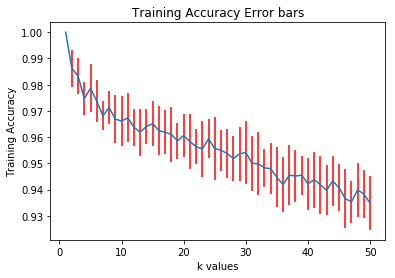

In [153]:
from matplotlib import pyplot as plt
# the y value will be the training mean
yValue = knnTrainingMean
# use range 1 to 50 
xValue = np.arange(1, 51)
# the error is the std we calculated earlier
y_err = knnTrainingStd
plt.errorbar(xValue, yValue, yerr=y_err, ecolor='r')
plt.xlabel('k values')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Error bars')

plt.show()

Produce your testing error bar plot here:

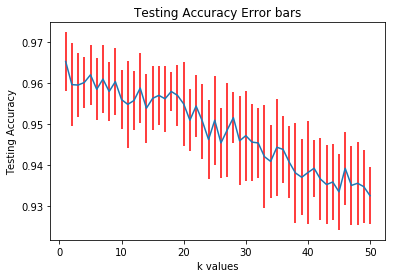

In [117]:
yValue = knnTestingMean
xValue = np.arange(1, 51)
y_err = knnTestingStd
plt.errorbar(xValue, yValue, yerr=y_err, ecolor='r')
plt.xlabel('k values')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy Error bars')

plt.show()

**Remember that all graphs should have axis labels and a title.**

Now, answer a few questions according to what you have observed.

Q1. What is the training accuracy obtained when $k=1$? Explain it.

In [118]:
print(knnTrainingMean[0])

1.0


Q2. Do the testing and training accuracies differ, and why?

Q3. How do the accuracies change as $k$ gets bigger, and why?

### Experiment 3

Compare three 5-NN classifiers using cosine distance.
First, randomly select 100 articles per class and keep these as your testing samples.

Then do the following:

(1) Train the first classifier using all the remaining articles.
Compute the confusion matrix for the 4 classes using the testing samples.

In [151]:
def confusionMatrix(predicted, classifier):
    
    # this is the size of the whole array divided by four and already casted to an int
    size = int(predicted.size / 4) 
    
    # Finding true positive depending on the class
    if classifier == 1:
        # grabbing the part of the predicted array which contains the values which should be in 
        # in the first class
        classOnePredicted = predicted[:int(predicted.size / 4)]
        # comparing the predicted to what their value should be (0) 
        # then fetching the size of this array which tells us how many it correctly predicted
        classOneTruePositive = classOnePredicted[classOnePredicted == 0].size
    elif classifier == 2:
        # repeating this process but using the part of the array which should contain class 2
        classTwoPredicted = predicted[int(predicted.size / 4):int(predicted.size / 2)]
        classTwoTruePositive = classTwoPredicted[classTwoPredicted == 1].size # getting the size of the number of TP
    elif classifier == 3:
        # repeating the process but for the part which should contain class 3
        classThreePredicted = predicted[int(predicted.size / 2): int(predicted.size *(3/4))]
        classThreeTruePositive = classThreePredicted[classThreePredicted == 2].size
    elif classifier == 4:
        # repeating the process but for the part of the array which should contain class 4 
        # then comparing it with the correct value for 4 (3)
        classFourPredicted = predicted[int(predicted.size *(3/4)): int(predicted.size)]
        classFourTruePositive = classFourPredicted[classFourPredicted == 3].size
        
    # Finding False negatives depending on the class
    if classifier == 1:
        # we know the number of false negatives is the actual number of that class minus the number 
        # of that class that our algorithm predicted (number of each class = total size /4 = size)
        # I repeat this process using the True positive value I have already calculated
        classOneFalseNegative =  size - classOneTruePositive
    elif classifier == 2:
        classTwoFalseNegative =  size - classTwoTruePositive
    elif classifier == 3:
        classThreeFalseNegative =  size - classThreeTruePositive
    elif classifier == 4:
        classFourFalseNegative =  size - classFourTruePositive

    # Finding false positives depending on class
    # we can use the true positive value again to find the false positive value
    # if we just take the number of positives in total that were predicted and do the set difference of this and the 
    # true positive values then we get the false positive array and then we just take the size of this array
    if classifier == 1:
        classOneFalsePositive = np.setdiff1d(predicted[: size], classOneTruePositive).size
    elif classifier == 2:
        classTwoFalsePositive = np.setdiff1d(predicted[size : size *2], classTwoTruePositive).size
    elif classifier == 3:
        classThreeFalsePositive = np.setdiff1d(predicted[size*2 : int(size *(3/4))], classThreeTruePositive).size
    elif classifier == 4:    
        classFourFalsePositive = np.setdiff1d(predicted[int(size*(3/4)) : size*4], classFourTruePositive).size
        
    # Finding True negatives depending on classifier
    # Finding the true negatives can be done by adding up all the other values and taking away the total size of the
    # array
    if classifier == 1:
        classOneTrueNegative = (size * 4) - (classOneFalseNegative + classOneFalsePositive + classOneTruePositive)
    elif classifier == 2:
        classTwoTrueNegative = (size * 4) - (classTwoFalseNegative + classTwoFalsePositive + classTwoTruePositive)
    elif classifier == 3:
        classThreeTrueNegative = (size * 4) - (classThreeFalseNegative + classThreeFalsePositive + classThreeTruePositive)
    elif classifier == 4:
        classFourTrueNegative = (size * 4) - (classFourFalseNegative + classFourFalsePositive + classFourTruePositive)
        
    # returning the correct array depending on the class given
    if classifier == 1:
        return np.array([[classOneTruePositive, classOneFalsePositive],[classOneFalseNegative, classOneTrueNegative]])
    elif classifier == 2:
        return np.array([[classTwoTruePositive, classTwoFalsePositive],[classTwoFalseNegative, classTwoTrueNegative]])
    elif classifier == 3:
        return np.array([[classThreeTruePositive, classThreeFalsePositive],[classThreeFalseNegative, classThreeTrueNegative]])
    elif classifier == 4:
        return np.array([[classFourTruePositive, classFourFalsePositive],[classFourFalseNegative, classFourTrueNegative]])

    
    
    
# im sorry about this code

# grabbing the testing samples
testing_samples_5 = sample_indices(labels, 100, 100, 100, 100)
all_the_samples_5 = sample_indices(labels, 200, 200, 200, 200)
training_samples_5 = np.setdiff1d(all_the_samples_5, testing_samples_5)


knn_exp3_1 = knn_classify(data[testing_samples_5], data[training_samples_5], labels[training_samples_5], "cosine", 5)

# True positive for CM 1


# printing the confusion matrix out for each class


print("Confusion matrix for class 1")
print(confusionMatrix(knn_exp3_1, 1))
print("Confusion matrix for class 2")
print(confusionMatrix(knn_exp3_1, 2))
print("Confusion matrix for class 3")
print(confusionMatrix(knn_exp3_1, 3))
print("Confusion matrix for class 4")
print(confusionMatrix(knn_exp3_1, 4))


Confusion matrix for class 1
[[ 99   2]
 [  1 298]]
Confusion matrix for class 2
[[ 96   4]
 [  4 296]]
Confusion matrix for class 3
[[ 99   0]
 [  1 300]]
Confusion matrix for class 4
[[ 98   4]
 [  2 296]]


(2) Randomly remove 95 training articles from class 2.
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

In [148]:
class2minus95 = np.random.choice(training_samples_5[100:200], 5)

# making the new training data set out of the original data set plus class 2 in the right place 
newTrainer95 = np.concatenate([training_samples_5[:100], class2minus95, training_samples_5[200:400]])
# training using the KNN implementation
knn_train_95_minused = knn_classify(data[testing_samples_5], data[newTrainer95], labels[newTrainer95], "cosine", 5)

# print the confusion matrices
print("Confusion matrix for class 1")
print(confusionMatrix(knn_train_95_minused, 1))
print("Confusion matrix for class 2")
print(confusionMatrix(knn_train_95_minused, 2))
print("Confusion matrix for class 3")
print(confusionMatrix(knn_train_95_minused, 3))
print("Confusion matrix for class 4")
print(confusionMatrix(knn_train_95_minused, 4))

Confusion matrix for class 1
[[ 95   3]
 [  5 297]]
Confusion matrix for class 2
[[ 59   4]
 [ 41 296]]
Confusion matrix for class 3
[[ 97   0]
 [  3 300]]
Confusion matrix for class 4
[[ 97   4]
 [  3 296]]


(3) Redo (2), but randomly remove 95 training articles from *all* the classes.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

In [154]:
# selecting 5 randomly from each class (instead of just from class 2 this time)
class1minus95 = np.random.choice(training_samples_5[:100], 5)
class2minus95_1 = np.random.choice(training_samples_5[100:200], 5)
class3minus95 = np.random.choice(training_samples_5[200:300], 5)
class4minus95 = np.random.choice(training_samples_5[300:400], 5)

# concatenating all the new training classes into a new ultra bad collection of classes 
newTrainer95_all_classes = np.concatenate((class1minus95, class2minus95_1, class3minus95, class4minus95))

# training using the KNN implementation
knn_train_95_all_classes = knn_classify(data[testing_samples_5], data[newTrainer95_all_classes], labels[newTrainer95_all_classes], "cosine", 5)

# printing the confusion matrices for each class
print("Confusion matrix for class 1")
print(confusionMatrix(knn_train_95_all_classes, 1))
print("Confusion matrix for class 2")
print(confusionMatrix(knn_train_95_all_classes, 2))
print("Confusion matrix for class 3")
print(confusionMatrix(knn_train_95_all_classes, 3))
print("Confusion matrix for class 4")
print(confusionMatrix(knn_train_95_all_classes, 4))

Confusion matrix for class 1
[[ 96   3]
 [  4 297]]
Confusion matrix for class 2
[[ 72   4]
 [ 28 296]]
Confusion matrix for class 3
[[ 90   0]
 [ 10 300]]
Confusion matrix for class 4
[[ 88   4]
 [ 12 296]]


TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'

Repeat the whole thing a few times.
Which of the three classifiers performs the worst?
Try to analyse why this might be.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab.
Please find the coursework submission instruction from the following link:
https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework

This exercise is worth 15 marks — marks will be allocated roughly on the basis of:
* rigorous experimentation,
* knowledge displayed when talking to the TA,
* problem solving skill,
* self-learning ability,
* how informative and well presented your graphs are,
* language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| k-NN Implementation      | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |